# House Sale Prediction (Regression)

## Intro
House prices are difficult to measure due to changes in the composition of properties sold from time to time and changes in the quality of housing. 

## Problem
- Finding a more effective way to calculate house price that accurately reflects the market price


## Goals
- Focus on finding the house price accurately 

## Data :
- **id** : A notation for a house
- **date** : Date house was sold
- **price** : Price is prediction target
- **bedrooms** : Number of bedrooms
- **bathrooms** : Number of bathrooms

- **sqft_living**:  Square footage of the home
- **sqft_lot** : Square footage of the lot
- **floors** :Total floors (levels) in house

- **waterfront** :House which has a view to a waterfront
- **view**: Has been viewed
- **condition** : How good the condition is overall
- **grade** : overall grade given to the housing unit, based on King County grading system

- **sqft_above** : Square footage of house apart from basement
- **sqft_basement** : Square footage of the basement

- **yr_built** : Built Year
- **yr_renovated** : Year when house was renovated

- **zipcode**: Zip code
- **lat**: Latitude coordinate
- **long** : Longitude coordinate
- **sqft_living15** : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15** : LotSize area in 2015(implies-- some renovations)

**Bathroom explaination :**
> Full Bathroom (1 Bath)
    - A full bathroom contains four key items: a bathtub, a shower, a toilet, and a sink with running water
> Three-Quarter Bathroom (3/4 Bath)
    - A shower, a toilet, and a sink with running water
> Half Bathroom (1/2 Bath)
    - A shower and a sink; OR
    - A toilet and a shower
> Quarter Bathroom (1/4 Bath)
    - Just a shower
    
-- Source :
https://www.thetruthaboutrealty.com/half-bath-vs-full-bath-wheres-the-value/

## Target
- Price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Data Sets

In [3]:
df = pd.read_csv('housesale.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Display the data types of each column using the attribute dtypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Method describe to obtain a statistical summary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/ (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

    
pd.DataFrame(data = bsDesc, columns=[
    'Columns Name',
    'Data Type',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Columns Name,Data Type,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[9320350130, 984220330]"
1,date,object,0,0.0,372,"[20140512T000000, 20150124T000000]"
2,price,float64,0,0.0,4028,"[278226.0, 952500.0]"
3,bedrooms,int64,0,0.0,13,"[6, 1]"
4,bathrooms,float64,0,0.0,30,"[5.0, 1.75]"
5,sqft_living,int64,0,0.0,1038,"[2009, 3085]"
6,sqft_lot,int64,0,0.0,9782,"[14240, 5855]"
7,floors,float64,0,0.0,6,"[1.0, 1.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 2]"


In [8]:
# Convert data type of 'date'
import datetime
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

In [9]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/ (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

    
pd.DataFrame(data = bsDesc, columns=[
    'Columns Name',
    'Data Type',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Columns Name,Data Type,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[2522029039, 7702020030]"
1,date,datetime64[ns],0,0.0,372,"[2014-05-28T00:00:00.000000000, 2015-03-16T00:..."
2,price,float64,0,0.0,4028,"[850830.0, 194900.0]"
3,bedrooms,int64,0,0.0,13,"[4, 6]"
4,bathrooms,float64,0,0.0,30,"[5.5, 1.5]"
5,sqft_living,int64,0,0.0,1038,"[4133, 1741]"
6,sqft_lot,int64,0,0.0,9782,"[11468, 11259]"
7,floors,float64,0,0.0,6,"[1.0, 3.0]"
8,waterfront,int64,0,0.0,2,"[1, 0]"
9,view,int64,0,0.0,5,"[1, 3]"


Drop the columns `id` using the method `drop()`

In [10]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


# We have 0 values of missing value for bedrooms and bathrooms

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [14]:
# Make sure the value in bedrooms and bathrooms
# Checking if we have a house with bedrooms < 1
df[df['bedrooms'] < 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [15]:
# Checking if we have a house with bathrooms < 1
df[df['bathrooms'] < 0.25]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [16]:
# Replacing bedrooms and bathrooms 0 value with their median
# Median bedrooms = 3.00
# Median bathrooms = 2.250
# Reason of using median : The value of the mean will change (decrease), but the median will not until a bigger change occurs.
# Therefore, the median is a more reliable and more stable number than the mean.

df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [17]:
df[df['bedrooms'] < 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [18]:
df[df['bathrooms'] < 0.25]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
# Add month column
df['month'] = df['date'].dt.month

# Add month column
df['day'] = df['date'].dt.day

# Show new table
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,18


## Exploratory Data Analysis

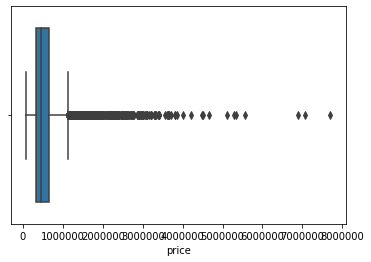

In [20]:
sns.boxplot(df['price'])

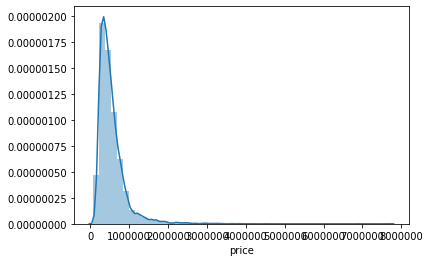

In [21]:
sns.distplot(df['price'])

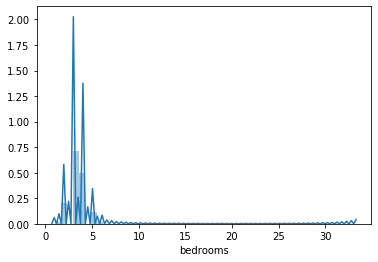

In [22]:
sns.distplot(df['bedrooms'])

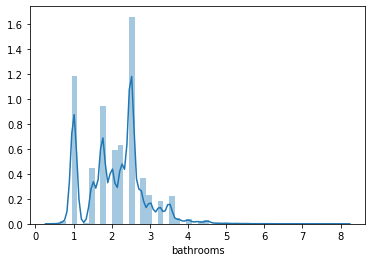

In [23]:
sns.distplot(df['bathrooms'])

## Multivariate

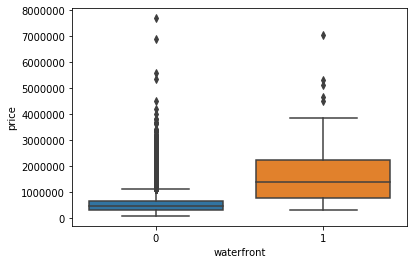

In [24]:
# Use the function `boxplot` to determine whether houses with or without a waterfront view have more price outliers
sns.boxplot(x = df["waterfront"], y = df["price"], data = df)

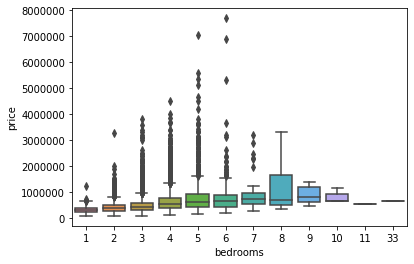

In [25]:
# Use the function `boxplot` to determine whether number of bedrooms have more price outliers
sns.boxplot(x = df["bedrooms"], y = df["price"], data = df)

### Analysis
The price will rise when a home has additional bedrooms

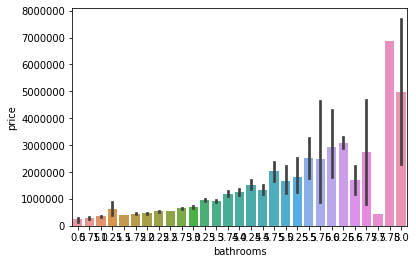

In [26]:
# Use the function `boxplot` to determine whether number of bathrooms have more price outliers
sns.barplot(x = df["bathrooms"], y = df["price"], data = df)

### Analysis
A house with more bathroom will increase the price

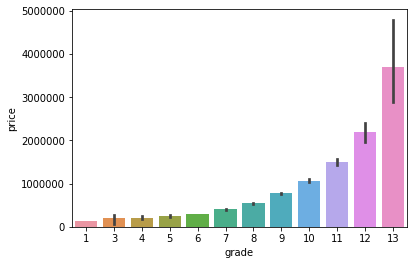

In [27]:
# Use the function `boxplot` to determine whether number of grades have more price outliers
sns.barplot(x = df["grade"], y = df["price"], data = df)

### Analysis
The higher grades indicate more value to the price

In [28]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

### Analysis
- Mostly we have houses with one floor

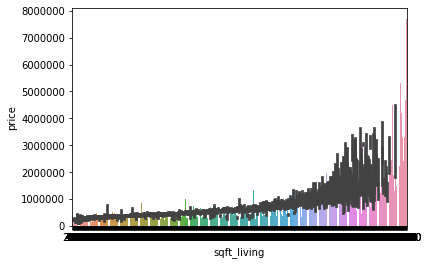

In [29]:
# Use the function `boxplot` to determine the house size and price
sns.barplot(x = df["sqft_living"], y = df["price"], data = df)

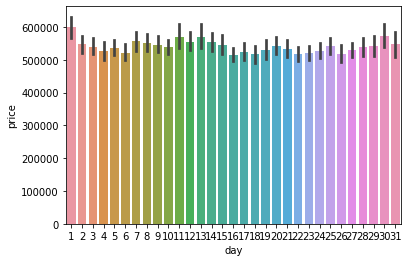

In [30]:
# Use the function `boxplot` to determine the day and price
sns.barplot(x = df["day"], y = df["price"], data = df)

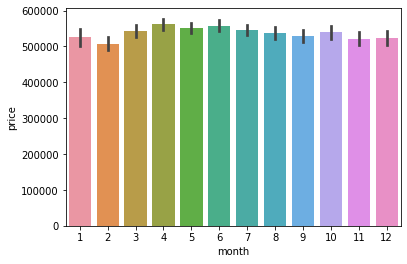

In [31]:
# Use the function `boxplot` to determine the month and price
sns.barplot(x = df["month"], y = df["price"], data = df)

(0, 8081250.016694261)

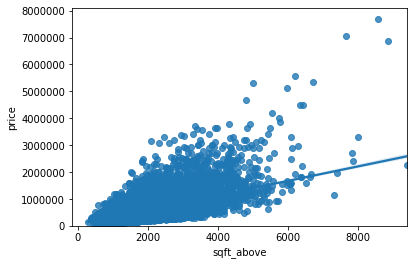

In [32]:
# Use the function `regplot` to  determine if the feature `sqft_above` is negatively or positively correlated with price (Target)
sns.regplot(x = df["sqft_above"], y = df["price"], data = df)
plt.ylim(0,)

(0, 8081250.016694261)

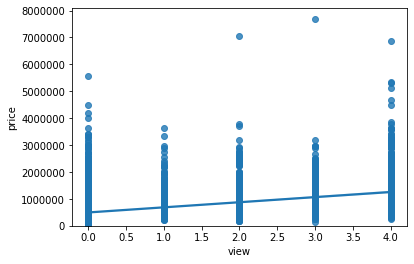

In [33]:
# Use the function `regplot` to  determine if the feature `view` is negatively or positively correlated with price (Target)
sns.regplot(x = df["view"], y = df["price"], data = df)
plt.ylim(0,)

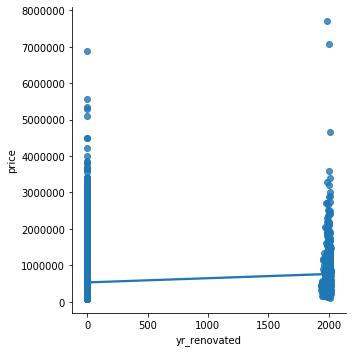

In [34]:
sns.lmplot(x="yr_renovated", y="price", data=df)

**Correlation**
Check method `Correlation` to find the feature other than price that is most correlated with price

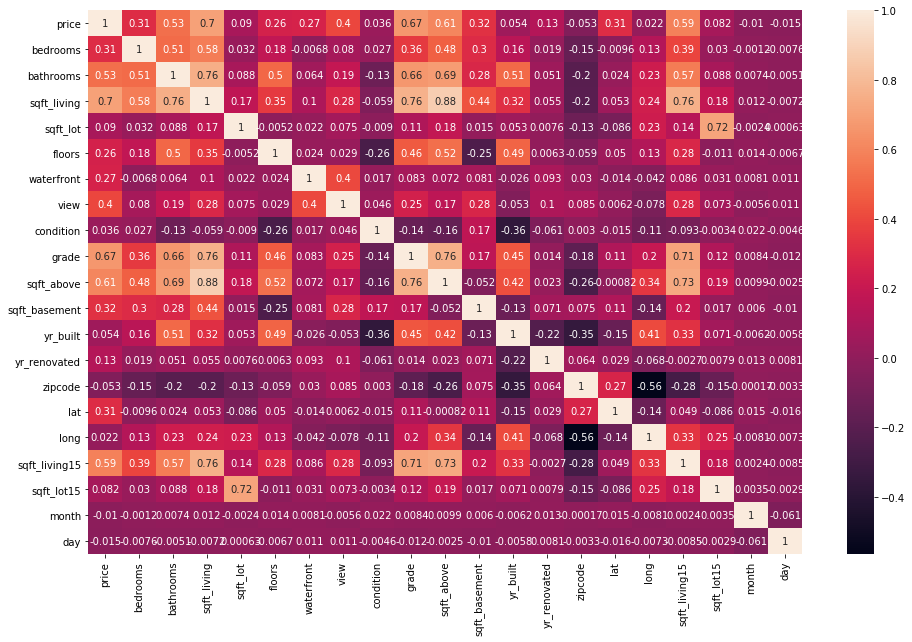

In [35]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
df.corr()['price'].sort_values()

zipcode         -0.053203
day             -0.014670
month           -0.010081
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525714
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Analysis
- Correlation ranging from -1 to +1
- A high correlation means that two or more variables have a strong relationship with each other
    > Based on the result of correlation, features that considerably have :
    - weak relationship : **zipcode, day, month, long, condition, yr_built, sqft_lot15, sqft_lot, yr_renovated**
    - moderate relationship : **floors, waterfront, lat, bedrooms, sqft_basement, view**
    - strong relationship : **Bathrooms, sqft_living15, sqft_above, grade, sqft_living**